## Importing Datasets

In [ ]:
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# For Model building and Training
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.metrics import multilabel_confusion_matrix


In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # For Plotting
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Plot and Other Display Settings.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/train.csv')

In [ ]:
training_df.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,...,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,...,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [ ]:
testing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon/test.csv')

In [ ]:
testing_df.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency
0,1dffd171-010b-4773-894f-4095077b0e31,Aradhya,Deep,14,2,13,14,2,14,6,...,3.0,4.0,3.0,3.0,3.0,NaN,1,3,4,1
1,cf0e7f8c-b22b-410c-8ad6-4a5bfd4d11cf,Anahita,Anand,17,3,6,0,1,0,4,...,0.0,1.0,0.0,0.0,0.0,1.0,1,2,3,1
2,49c9f6ef-58f2-4334-bb44-9a4ded2e587f,Amani,Tak,14,9,10,14,7,10,4,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1
3,daab9520-7716-4b1e-b791-907912a81f79,Tushar,Sodhi,7,14,4,12,11,6,13,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
4,9d4adc34-368e-4642-98a2-58d73b4294f7,Jivika,Rana,13,3,3,16,1,15,4,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,3,1


In [ ]:
training_df.shape

(1106674, 62)

In [ ]:
testing_df.shape

(474289, 60)

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

## Data Preprocessing

In [ ]:
dict(training_df.isnull().sum())

{'customer_id': 0,
 'firstname': 0,
 'lastname': 0,
 'record_number': 0,
 'days_since_opened': 0,
 'days_since_confirmed': 0,
 'primary_term': 0,
 'final_term': 0,
 'days_till_primary_close': 0,
 'days_till_final_close': 0,
 'loans_credit_limit': 0,
 'loans_next_payment_summary': 0,
 'loans_outstanding_balance': 0,
 'loans_max_overdue_amount': 0,
 'loans_credit_cost_rate': 0,
 'loans_within_5_days': 0,
 'loans_within_5_to_30_days': 0,
 'loans_within_30_to_60_days': 0,
 'loans_within_60_to_90_days': 0,
 'loans_over_90_days': 0,
 'is_zero_loans_within_5_days': 0,
 'is_zero_loans_within_5_to_30_days': 0,
 'is_zero_loans_within_30_to_60_days': 0,
 'is_zero_loans_within_60_to_90_days': 0,
 'is_zero_loans_over_90_days': 0,
 'utilization': 0,
 'over_limit_count': 0,
 'max_over_limit_count': 0,
 'is_zero_utilization': 0,
 'is_zero_over_limit_count': 0,
 'is_zero_max_over_limit_count': 0,
 'encoded_payment_0': 37619,
 'encoded_payment_1': 35744,
 'encoded_payment_2': 34612,
 'encoded_payment_3'

In [ ]:
def fill_missing_value(df):
    encoded_features = ['encoded_payment_' + str(i) for i in range(25)]
    imputer = SimpleImputer(strategy ='most_frequent')
    df[encoded_features] = imputer.fit_transform(df[encoded_features])

    return df

In [ ]:
#dict(training_df.isnull().sum())

In [ ]:
def drop_columns(df):
    drop_columns = ['customer_id','firstname','lastname']
    df = df.drop(columns=drop_columns)
    return df

In [ ]:
label = ['primary_close_flag', 'final_close_flag']

In [ ]:
def normalization(df):
    min_max_scaler = MinMaxScaler()
    label = ['primary_close_flag', 'final_close_flag']

    for column in df.columns:
        if column not in label and pd.api.types.is_numeric_dtype(df[column]):
            df[column] = min_max_scaler.fit_transform(df[[column]])
    return df

In [ ]:
def categorical_to_numerals(df):
    columns_to_encode = [
      'is_zero_loans_within_5_days',
      'is_zero_loans_within_5_to_30_days',
      'is_zero_loans_within_30_to_60_days',
      'is_zero_loans_within_60_to_90_days',
      'is_zero_loans_over_90_days',
      'is_zero_utilization',
      'is_zero_over_limit_count',
      'is_zero_max_over_limit_count'
      ]

    encoder = LabelEncoder()

    for column in columns_to_encode:
        df[column] = encoder.fit_transform(df[column])
    #print('column : ',df.columns)

    return df

In [ ]:
def preprocessing(df):
    print("Starting Step 1 : fill_missing_value")
    df = fill_missing_value(df)
    print("Step 1 : fill_missing_value Completed")
    print("Starting Step 2 : dropping Columns")
    df = drop_columns(df)
    print("Step 2 : dropping Columns Completed")
    print("Starting Step 3 : normalization")
    df = normalization(df)
    print("Step 3 : normalization Completed")
    print("Starting Step 4 : categorical_to_numerals")
    df = categorical_to_numerals(df)
    print("Step 4 : categorical_to_numerals Completed")
    return df

In [ ]:
training_df = preprocessing(training_df)

Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 3 : normalization
Step 3 : normalization Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


In [ ]:
testing_df = preprocessing(testing_df)

Starting Step 1 : fill_missing_value
Step 1 : fill_missing_value Completed
Starting Step 2 : dropping Columns
Step 2 : dropping Columns Completed
Starting Step 3 : normalization
Step 3 : normalization Completed
Starting Step 4 : categorical_to_numerals
Step 4 : categorical_to_numerals Completed


## Exploratory Analysis

In [ ]:
sum(training_df['primary_close_flag'] != training_df['final_close_flag'])/len(training_df)
# Checking Propotion of 2 Output Labels which different in primary and Final Flags

0.16817870483990768

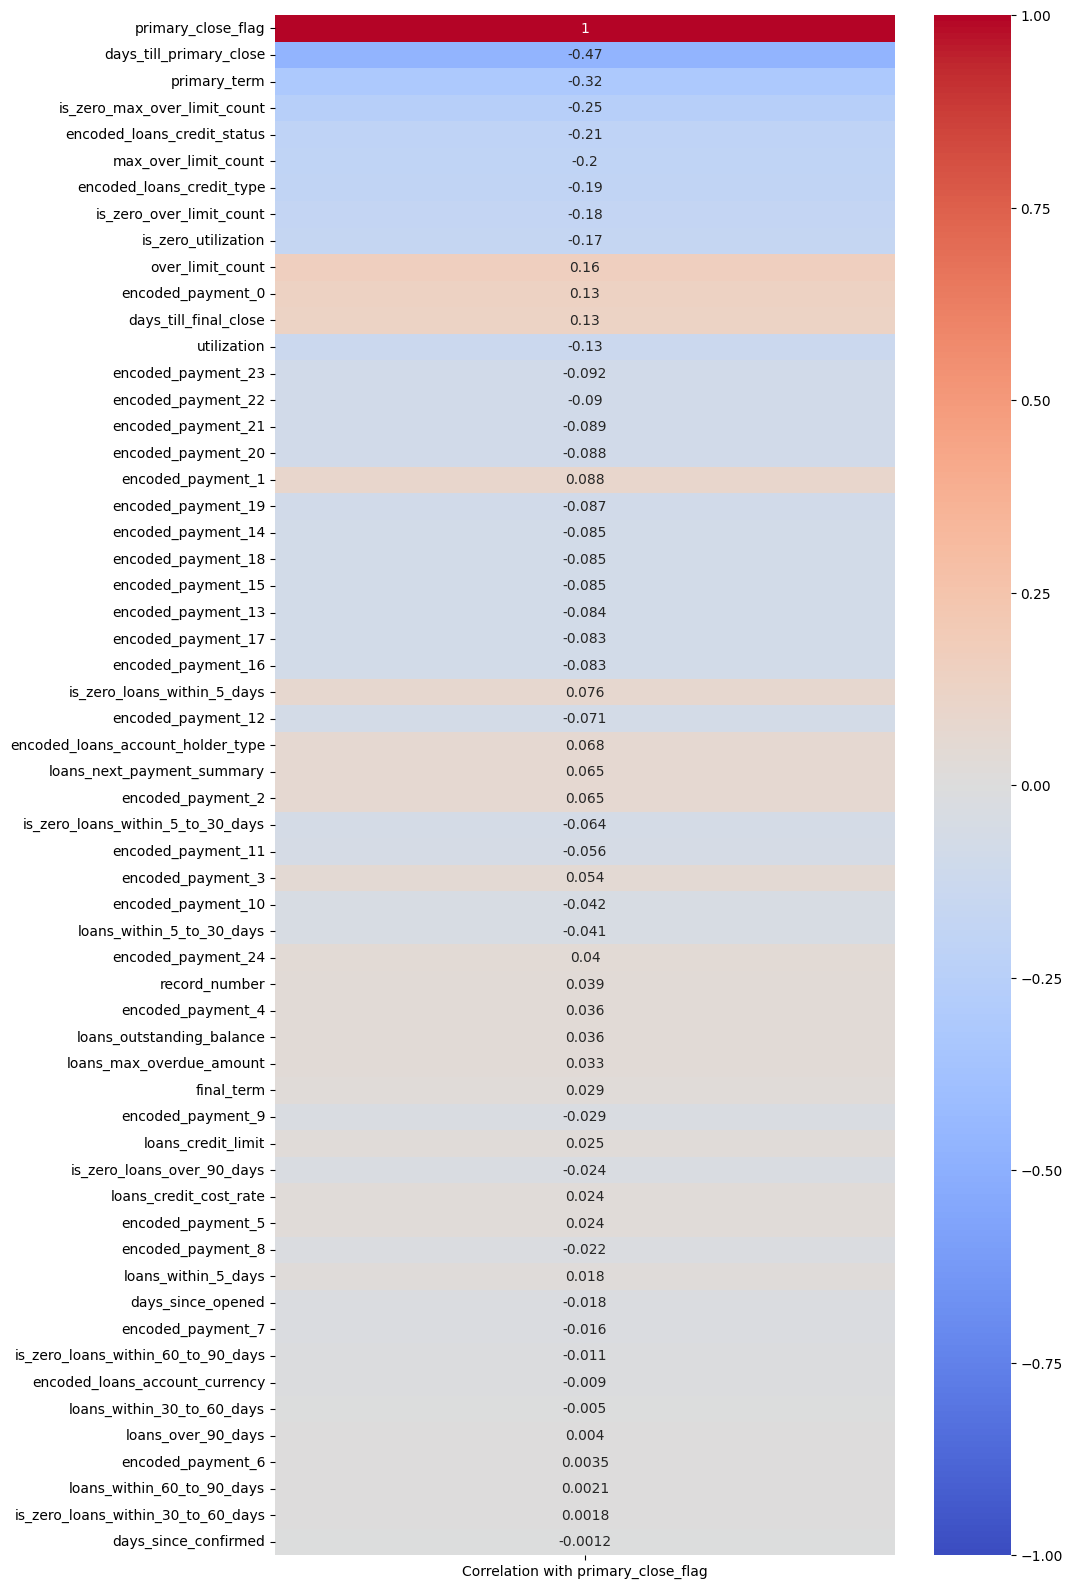

In [ ]:
# Correlation Matrix:

correlation_matrix = training_df.corrwith(training_df['primary_close_flag']).iloc[::-2].to_frame()
correlation_matrix.columns = ['Correlation with primary_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with primary_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

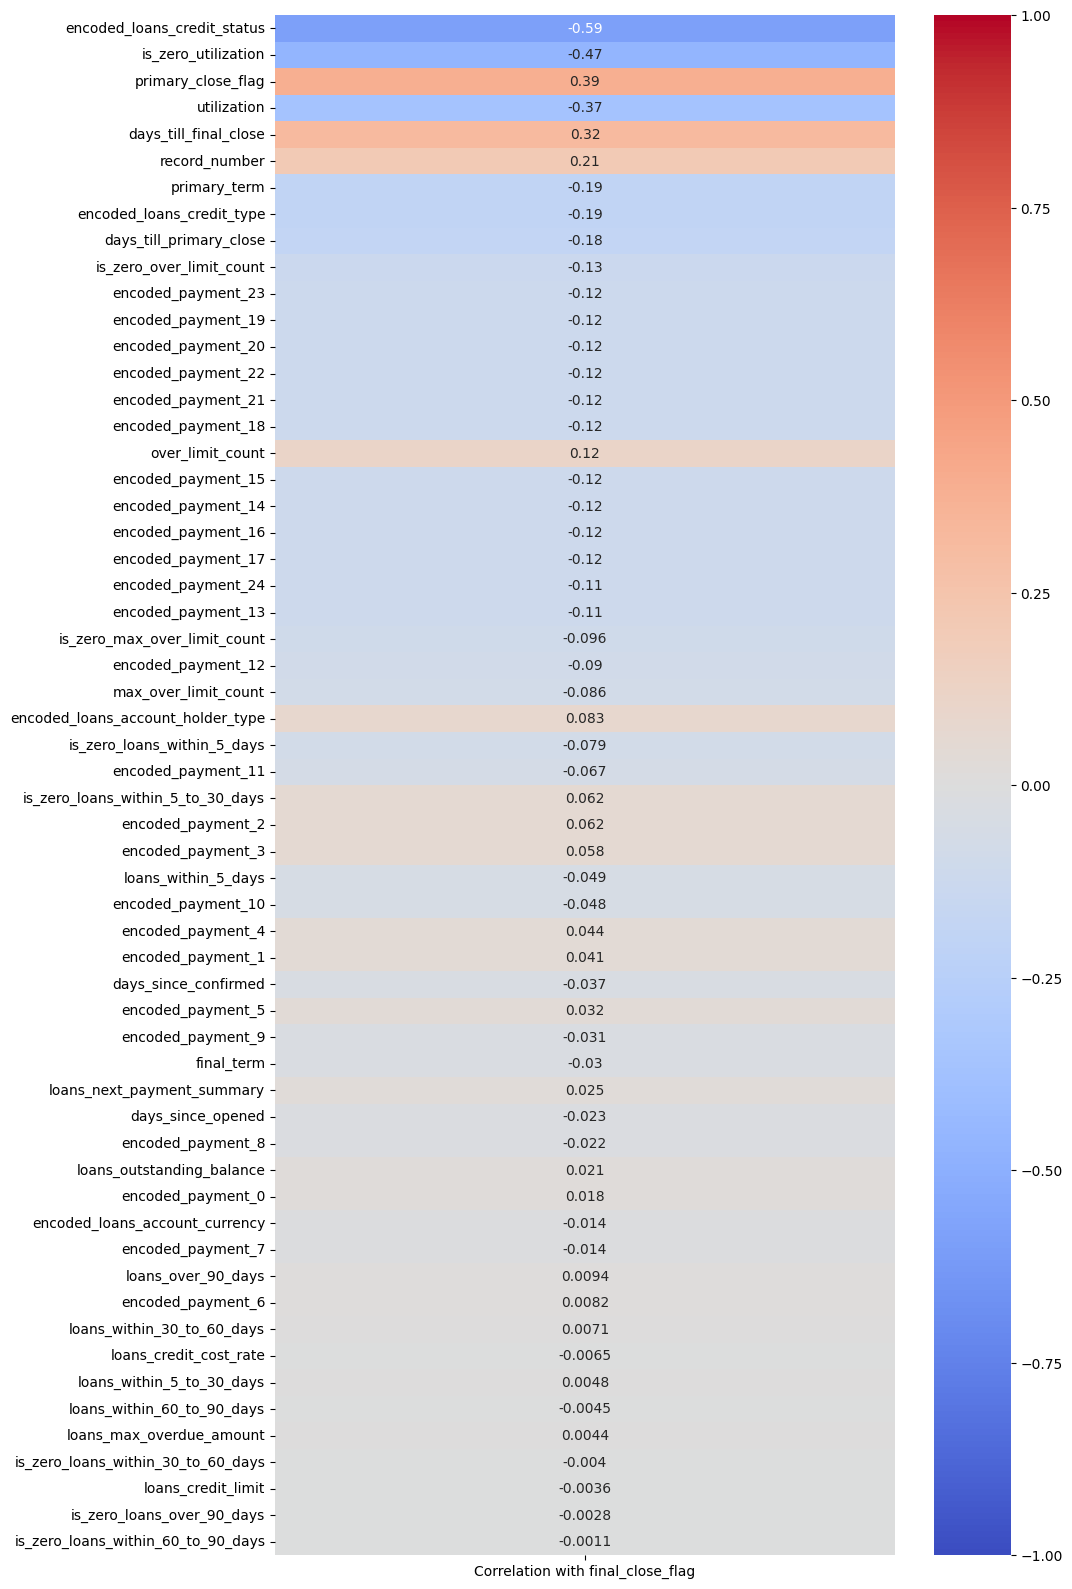

In [ ]:
# Correlation Matrix for Final_close_flag:

correlation_matrix = training_df.corrwith(training_df['final_close_flag']).iloc[:-1].to_frame()
correlation_matrix.columns = ['Correlation with final_close_flag']
correlation_matrix['Abs Correlation'] = correlation_matrix.abs()

sorted_correlations = correlation_matrix.sort_values('Abs Correlation', ascending=False)['Correlation with final_close_flag']

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [ ]:
correlation = training_df[['primary_close_flag', 'final_close_flag']].corr()


In [ ]:
correlation

,primary_close_flag,final_close_flag
primary_close_flag,1.0,0.4
final_close_flag,0.4,1.0


## Test Train Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data():
    #Splitting the data for Training
    x = training_df.drop(columns=label)
    y = training_df[label]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
    return x,y,x_train, x_test, y_train, y_test

In [ ]:
print("splitting data")
x,y,x_train, x_test, y_train, y_test = split_data()

splitting data


## Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Model 1


In [ ]:
# Define the model
model = Sequential()

# Add the first hidden layer with 128 nodes
model.add(Dense(128, input_dim=57, activation='relu'))

# Add the second hidden layer with 64 nodes
model.add(Dense(64, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now the model is ready to be trained with your data
# model.fit(X_train, y_train, epochs=10, batch_size=32)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7424      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15940 (62.27 KB)
Trainable params: 15940 (62.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 4) are incompatible


### Model 2


In [ ]:
# Define the model
model = Sequential()

# Add the first hidden layer with 128 nodes
model.add(Dense(128, input_dim=57, activation='relu'))

# Add the second hidden layer with 64 nodes
model.add(Dense(64, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model.add(Dense(2, activation='sigmoid'))  # Change here

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
history1 = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
24209/24209 [==============================] - 88s 4ms/step - loss: 0.0427 - accuracy: 0.5319
Epoch 2/10
24209/24209 [==============================] - 84s 3ms/step - loss: 0.0063 - accuracy: 0.6440
Epoch 3/10
24209/24209 [==============================] - 84s 3ms/step - loss: 0.0052 - accuracy: 0.6998
Epoch 4/10
24209/24209 [==============================] - 84s 3ms/step - loss: 0.0042 - accuracy: 0.7246
Epoch 5/10
24209/24209 [==============================] - 87s 4ms/step - loss: 0.0037 - accuracy: 0.7270
Epoch 6/10
24209/24209 [==============================] - 83s 3ms/step - loss: 0.0034 - accuracy: 0.7366
Epoch 7/10
24209/24209 [==============================] - 90s 4ms/step - loss: 0.0029 - accuracy: 0.7253
Epoch 8/10
24209/24209 [==============================] - 89s 4ms/step - loss: 0.0027 - accuracy: 0.7304
Epoch 9/10
24209/24209 [==============================] - 89s 4ms/step - loss: 0.0025 - accuracy: 0.7142
Epoch 10/10
24209/24209 [==============================

### New Model

In [ ]:
# Define the model
model1 = Sequential()

# Add the first hidden layer with 128 nodes
model1.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model1.add(Dense(64, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))

model1.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model1.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               7424      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 2)                

In [ ]:
history3 = model1.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
4842/4842 [==============================] - 28s 5ms/step - loss: 0.0769 - accuracy: 0.3802 - val_loss: 0.0139 - val_accuracy: 0.3450
Epoch 2/10
4842/4842 [==============================] - 25s 5ms/step - loss: 0.0095 - accuracy: 0.4735 - val_loss: 0.0140 - val_accuracy: 0.4053
Epoch 3/10
4842/4842 [==============================] - 22s 5ms/step - loss: 0.0068 - accuracy: 0.6402 - val_loss: 0.0021 - val_accuracy: 0.7323
Epoch 4/10
4842/4842 [==============================] - 24s 5ms/step - loss: 0.0054 - accuracy: 0.6292 - val_loss: 0.0031 - val_accuracy: 0.7319
Epoch 5/10
4842/4842 [==============================] - 23s 5ms/step - loss: 0.0049 - accuracy: 0.6303 - val_loss: 0.0039 - val_accuracy: 0.2070
Epoch 6/10
4842/4842 [==============================] - 24s 5ms/step - loss: 0.0042 - accuracy: 0.5749 - val_loss: 0.0027 - val_accuracy: 0.8289
Epoch 7/10
4842/4842 [==============================] - 25s 5ms/step - loss: 0.0038 - accuracy: 0.5137 - val_loss: 0.0022 - val_ac

In [ ]:
history3_1 = model1.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
4842/4842 [==============================] - 26s 5ms/step - loss: 0.0030 - accuracy: 0.5659 - val_loss: 0.0025 - val_accuracy: 0.6864
Epoch 2/5
4842/4842 [==============================] - 23s 5ms/step - loss: 0.0027 - accuracy: 0.4367 - val_loss: 0.0031 - val_accuracy: 0.5604
Epoch 3/5
4842/4842 [==============================] - 26s 5ms/step - loss: 0.0026 - accuracy: 0.5952 - val_loss: 0.0018 - val_accuracy: 0.2133
Epoch 4/5
4842/4842 [==============================] - 24s 5ms/step - loss: 0.0024 - accuracy: 0.5967 - val_loss: 0.0010 - val_accuracy: 0.7019
Epoch 5/5
4842/4842 [==============================] - 22s 5ms/step - loss: 0.0023 - accuracy: 0.7903 - val_loss: 0.0019 - val_accuracy: 0.6504


In [ ]:
history3_2 = model1.fit(x_train, y_train, epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
4842/4842 [==============================] - 23s 5ms/step - loss: 0.0020 - accuracy: 0.3332 - val_loss: 9.9793e-04 - val_accuracy: 0.2094
Epoch 2/5
4842/4842 [==============================] - 24s 5ms/step - loss: 0.0020 - accuracy: 0.3421 - val_loss: 0.0011 - val_accuracy: 0.2287
Epoch 3/5
4842/4842 [==============================] - 24s 5ms/step - loss: 0.0021 - accuracy: 0.4243 - val_loss: 9.7672e-04 - val_accuracy: 0.2073
Epoch 4/5
4842/4842 [==============================] - 25s 5ms/step - loss: 0.0019 - accuracy: 0.2867 - val_loss: 0.0092 - val_accuracy: 0.2319
Epoch 5/5
4842/4842 [==============================] - 25s 5ms/step - loss: 0.0018 - accuracy: 0.6381 - val_loss: 0.0012 - val_accuracy: 0.1791


#### Next Try

In [ ]:
history3_5 = model1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2)

Epoch 1/20
9684/9684 [==============================] - 49s 5ms/step - loss: 0.0578 - accuracy: 0.5364 - val_loss: 0.0126 - val_accuracy: 0.5615
Epoch 2/20
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0099 - accuracy: 0.6170 - val_loss: 0.0056 - val_accuracy: 0.6615
Epoch 3/20
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0068 - accuracy: 0.7136 - val_loss: 0.0058 - val_accuracy: 0.4572
Epoch 4/20
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0058 - accuracy: 0.7742 - val_loss: 0.0177 - val_accuracy: 0.7648
Epoch 5/20
9684/9684 [==============================] - 47s 5ms/step - loss: 0.0049 - accuracy: 0.6815 - val_loss: 0.0056 - val_accuracy: 0.8214
Epoch 6/20
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0044 - accuracy: 0.6001 - val_loss: 0.0013 - val_accuracy: 0.8414
Epoch 7/20
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0040 - accuracy: 0.7434 - val_loss: 0.0017 - val_ac

In [ ]:
history3_5_1 = model1.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.2)

Epoch 1/5
9684/9684 [==============================] - 47s 5ms/step - loss: 0.0024 - accuracy: 0.5769 - val_loss: 0.0029 - val_accuracy: 0.9178
Epoch 2/5
9684/9684 [==============================] - 48s 5ms/step - loss: 0.0019 - accuracy: 0.7856 - val_loss: 0.0013 - val_accuracy: 0.1755
Epoch 3/5
9684/9684 [==============================] - 58s 6ms/step - loss: 0.0020 - accuracy: 0.2589 - val_loss: 0.0012 - val_accuracy: 0.2093
Epoch 4/5
9684/9684 [==============================] - 46s 5ms/step - loss: 0.0021 - accuracy: 0.1978 - val_loss: 0.0012 - val_accuracy: 0.1694
Epoch 5/5
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0020 - accuracy: 0.1945 - val_loss: 0.0020 - val_accuracy: 0.2524


In [ ]:
# Save the model
model1.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_2_1.h5')

#### model3_6 with L2 Regularization


In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout

In [ ]:
# Define the model
model3_6 = Sequential()

# Add the first hidden layer with 128 nodes
model3_6.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model3_6.add(Dense(64, activation='relu'))
model3_6.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model3_6.add(Dense(32, activation='relu'))
model3_6.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3_6.add(Dense(32, activation='relu'))
model3_6.add(Dropout(0.5))
model3_6.add(Dense(32, activation='relu'))
model3_6.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model3_6.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model3_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
 history3_6 = model3_6.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/20
9684/9684 [==============================] - 58s 6ms/step - loss: 0.1176 - accuracy: 0.5437 - val_loss: 0.0343 - val_accuracy: 0.8308
Epoch 2/20
9684/9684 [==============================] - 56s 6ms/step - loss: 0.0264 - accuracy: 0.4719 - val_loss: 0.0302 - val_accuracy: 0.9803
Epoch 3/20
9684/9684 [==============================] - 57s 6ms/step - loss: 0.0169 - accuracy: 0.4273 - val_loss: 0.0247 - val_accuracy: 0.8585
Epoch 4/20
9684/9684 [==============================] - 56s 6ms/step - loss: 0.0140 - accuracy: 0.3455 - val_loss: 0.0126 - val_accuracy: 0.9310
Epoch 5/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0125 - accuracy: 0.4203 - val_loss: 0.0163 - val_accuracy: 0.9087
Epoch 6/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0103 - accuracy: 0.4244 - val_loss: 0.0240 - val_accuracy: 0.9775
Epoch 7/20
9684/9684 [==============================] - 53s 5ms/step - loss: 0.0090 - accuracy: 0.5993 - val_loss: 0.0112 - val_ac

In [ ]:
# Save the model
model3_6.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_3_6.h5')


## Plotting

### Plot 1

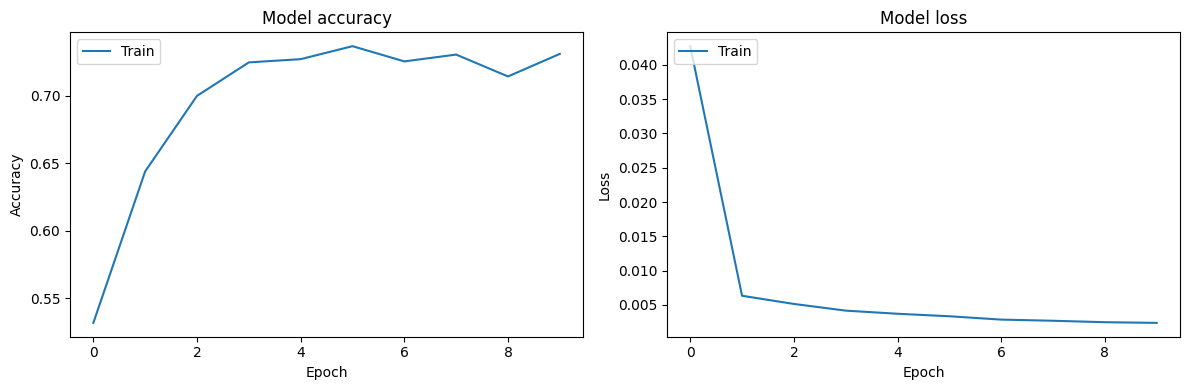

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
#plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
#plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Plot 2 For History3

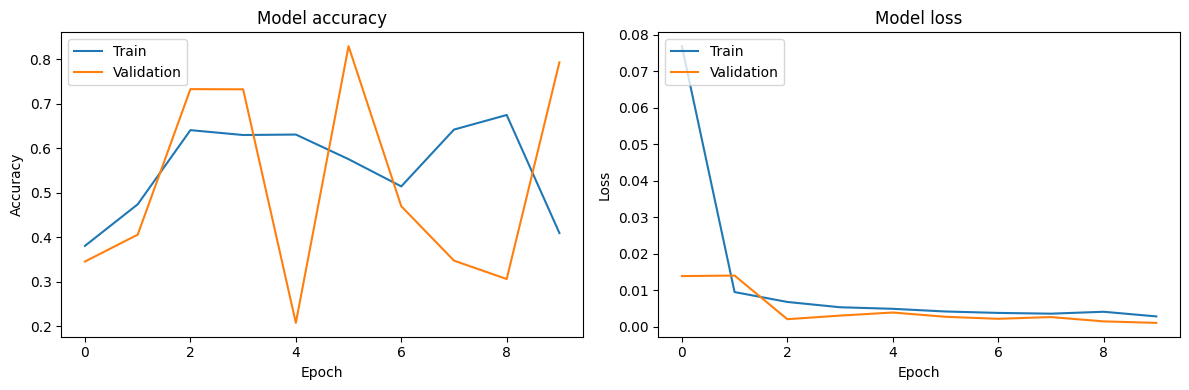

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


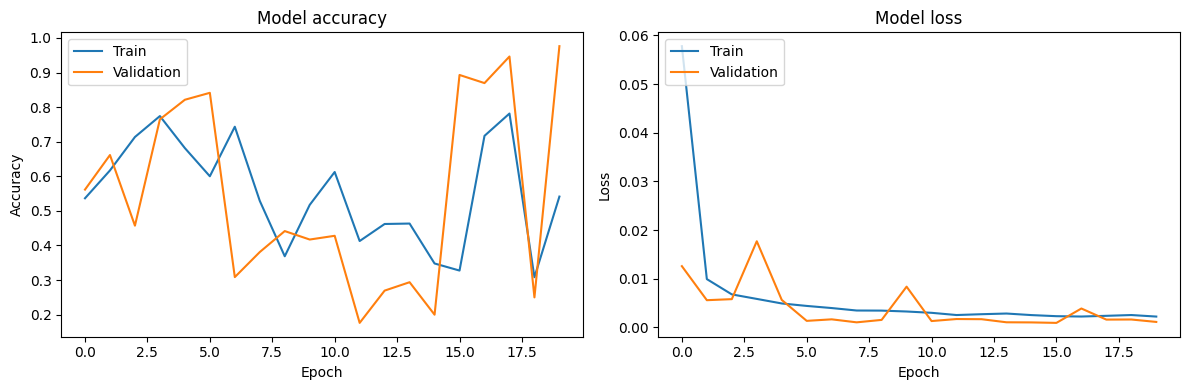

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3_5.history['accuracy'])
plt.plot(history3_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3_5.history['loss'])
plt.plot(history3_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


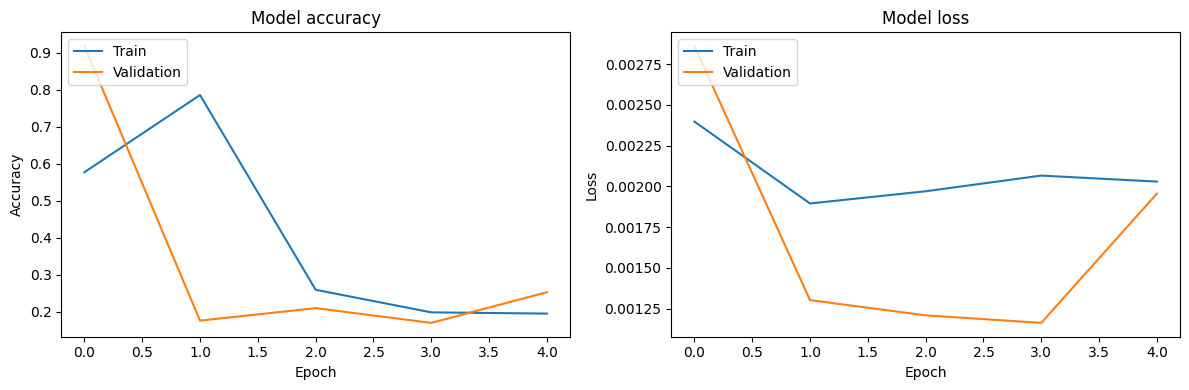

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3_5_1.history['accuracy'])
plt.plot(history3_5_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history3_5_1.history['loss'])
plt.plot(history3_5_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


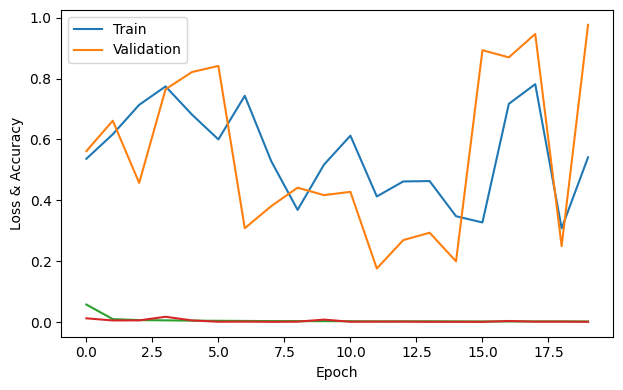

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3_5.history['accuracy'])
plt.plot(history3_5.history['val_accuracy'])
plt.plot(history3_5.history['loss'])
plt.plot(history3_5.history['val_loss'])
plt.ylabel('Loss & Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Saving The Model

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_1_1.h5')


In [ ]:
# !mv /content/Model_ANN_1.h5 '/content/drive/MyDrive/Colab Notebooks/Hackathon/'

In [ ]:
history2 = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
19367/19367 [==============================] - 78s 4ms/step - loss: 0.0022 - accuracy: 0.7243 - val_loss: 0.0025 - val_accuracy: 0.6854
Epoch 2/10
19367/19367 [==============================] - 79s 4ms/step - loss: 0.0019 - accuracy: 0.7310 - val_loss: 9.4275e-04 - val_accuracy: 0.7601
Epoch 3/10
19367/19367 [==============================] - 76s 4ms/step - loss: 0.0020 - accuracy: 0.7220 - val_loss: 8.8257e-04 - val_accuracy: 0.7144
Epoch 4/10
19367/19367 [==============================] - 78s 4ms/step - loss: 0.0018 - accuracy: 0.7124 - val_loss: 5.7661e-04 - val_accuracy: 0.7469
Epoch 5/10
19367/19367 [==============================] - 87s 4ms/step - loss: 0.0019 - accuracy: 0.7121 - val_loss: 9.8300e-04 - val_accuracy: 0.7086
Epoch 6/10
19367/19367 [==============================] - 91s 5ms/step - loss: 0.0019 - accuracy: 0.7251 - val_loss: 0.0026 - val_accuracy: 0.7361
Epoch 7/10
19367/19367 [==============================] - 81s 4ms/step - loss: 0.0016 - accuracy: 0.72

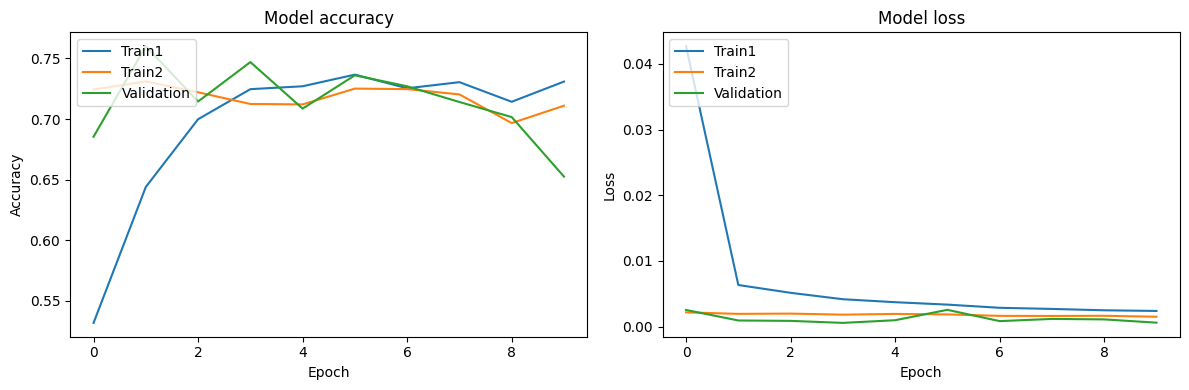

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train1','Train2', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train1','Train2', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
history2_1 = model.fit(x_train, y_train, epochs=5, batch_size=32,validation_split=0.2)

Epoch 1/5
19367/19367 [==============================] - 82s 4ms/step - loss: 0.0015 - accuracy: 0.6887 - val_loss: 5.8810e-04 - val_accuracy: 0.7221
Epoch 2/5
19367/19367 [==============================] - 80s 4ms/step - loss: 0.0015 - accuracy: 0.7322 - val_loss: 5.1295e-04 - val_accuracy: 0.7291
Epoch 3/5
19367/19367 [==============================] - 86s 4ms/step - loss: 0.0015 - accuracy: 0.7183 - val_loss: 0.0021 - val_accuracy: 0.6581
Epoch 4/5
19367/19367 [==============================] - 77s 4ms/step - loss: 0.0014 - accuracy: 0.7128 - val_loss: 5.6611e-04 - val_accuracy: 0.7368
Epoch 5/5
19367/19367 [==============================] - 79s 4ms/step - loss: 0.0013 - accuracy: 0.7129 - val_loss: 0.0012 - val_accuracy: 0.7045


# Saving The Model

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_1_2.h5')


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_1_2_1.h5')


In [ ]:
# tf.distribute.Strategy
#from keras.utils import multi_gpu_model

#parallel_model = multi_gpu_model(model, gpus=2)  # Change the number of GPUs according to your setup

# Compile the model
#parallel_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#history1 = parallel_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Final Validation

import shutil

# Define source and destination paths
source = '/content/Model_ANN_1.h5'
destination = '/content/drive/MyDrive/Model_ANN_1.h5'

# Copy the file
shutil.copy(source, destination)


In [ ]:
#from keras.models import load_model

# Load the model
#loaded_model = load_model('my_model.h5')

In [ ]:
# Fit the model
#model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


In [ ]:
from keras.models import load_model

In [ ]:
loaded_model3_6 = load_model('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_3_6.h5')

In [ ]:
loaded_model3_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 128)               7424      
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 32)                1056      
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)               

In [ ]:
print("Predicting")
start = time.time()
predictions_sub = loaded_model3_6.predict(testing_df)
print('Time Take :  %s minutes' % ((time.time() - start)/60))
print("DataFrame")
dt_f_submissions = pd.DataFrame({
    'primary_close_flag': predictions_sub[:, 0],
    'final_close_flag': predictions_sub[:, 1]
})

Predicting
14822/14822 [==============================] - 27s 2ms/step
Time Take :  0.7047409971555074 minutes
DataFrame


In [ ]:
predictions_sub[:5]

array([[0.01262002, 0.01148187],
       [0.01193664, 0.01071416],
       [0.01553939, 0.01487042],
       [0.01121327, 0.00991303],
       [0.01019001, 0.00880115]], dtype=float32)

In [ ]:
# Convert probabilities to class labels
threshold = 0.5
predictions_sub_label = (predictions_sub > threshold).astype(int)


In [ ]:
predictions_sub_label[:5]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [ ]:
dt_f_submissions = pd.DataFrame({
    'primary_close_flag': predictions_sub_label[:, 0],
    'final_close_flag': predictions_sub_label[:, 1]
})

In [ ]:
print("To_CSV")
dt_f_submissions.to_csv('/content/drive/MyDrive/Colab Notebooks/ANN3_6_submit.csv', index=False)
print("completed")

To_CSV
completed


# Accuracy from Submission : 0.99930


Retraining the model3_6 only for 17 epouchs


In [ ]:
# Define the model
model3_6_1 = Sequential()

# Add the first hidden layer with 128 nodes
model3_6_1.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model3_6_1.add(Dense(64, activation='relu'))
model3_6_1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model3_6_1.add(Dense(32, activation='relu'))
model3_6_1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3_6_1.add(Dense(32, activation='relu'))
model3_6_1.add(Dropout(0.5))
model3_6_1.add(Dense(32, activation='relu'))
model3_6_1.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model3_6_1.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model3_6_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
 history3_6_1 = model3_6_1.fit(x_train, y_train, epochs=17, batch_size=64,validation_split=0.2)

Epoch 1/17
9684/9684 [==============================] - 66s 6ms/step - loss: 0.1453 - accuracy: 0.5787 - val_loss: 0.0233 - val_accuracy: 0.8699
Epoch 2/17
9684/9684 [==============================] - 59s 6ms/step - loss: 0.0222 - accuracy: 0.8041 - val_loss: 0.0177 - val_accuracy: 0.7815
Epoch 3/17
9684/9684 [==============================] - 60s 6ms/step - loss: 0.0153 - accuracy: 0.7480 - val_loss: 0.0200 - val_accuracy: 0.3851
Epoch 4/17
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0132 - accuracy: 0.7470 - val_loss: 0.0153 - val_accuracy: 0.8642
Epoch 5/17
9684/9684 [==============================] - 53s 6ms/step - loss: 0.0130 - accuracy: 0.6598 - val_loss: 0.0124 - val_accuracy: 0.1780
Epoch 6/17
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0099 - accuracy: 0.6643 - val_loss: 0.0211 - val_accuracy: 0.2074
Epoch 7/17
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0099 - accuracy: 0.6651 - val_loss: 0.0274 - val_ac

In [ ]:
 history3_6_1_1 = model3_6_1.fit(x_train, y_train, epochs=20, batch_size=64,validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/20
9684/9684 [==============================] - 53s 6ms/step - loss: 0.0064 - accuracy: 0.5621 - val_loss: 0.0294 - val_accuracy: 0.1681
Epoch 2/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0058 - accuracy: 0.6302 - val_loss: 0.0265 - val_accuracy: 0.1687
Epoch 3/20
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0055 - accuracy: 0.5888 - val_loss: 0.0069 - val_accuracy: 0.1685
Epoch 4/20
9684/9684 [==============================] - 52s 5ms/step - loss: 0.0056 - accuracy: 0.5583 - val_loss: 0.0148 - val_accuracy: 0.1688
Epoch 5/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0051 - accuracy: 0.6170 - val_loss: 0.0078 - val_accuracy: 0.1680
Epoch 6/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0052 - accuracy: 0.5189 - val_loss: 0.0237 - val_accuracy: 0.1684
Epoch 7/20
9684/9684 [==============================] - 51s 5ms/step - loss: 0.0054 - accuracy: 0.5838 - val_loss: 0.0359 - val_ac

KeyboardInterrupt: 

In [ ]:
def predict_score(classifier_name):
    #Calculate Score of Classifier on test data
    score = classifier_name.score(x_test, y_test)
    print("Score on Test Data: ",score)

In [ ]:
def print_accuracy(pred):
    # for classification we use accuracy and F1 score
    acc_score = accuracy_score(y_test,pred)
    print("Accuracy Score : ",acc_score)
    f_score = f1_score(y_test,pred,average='weighted')
    print("F1 Score : ",f_score)
    print("Multilabel Confusion Matrix:")
    print(multilabel_confusion_matrix(y_test, pred))
    print("Classification Report:")
    print(classification_report(y_test, pred))

In [ ]:
def predict(class_model,data_set):
    return class_model.predict(data_set)
#predictions = predict(model3_6_1,x_test)


In [ ]:
predictions[:5]

array([[8.3606865e-05, 2.9799397e-04],
       [1.3318981e-04, 5.7544920e-04],
       [5.3124753e-05, 1.6812643e-04],
       [2.4160026e-03, 1.9663559e-02],
       [4.7615655e-03, 4.9103912e-02]], dtype=float32)

In [ ]:
# Convert probabilities to class labels
threshold = 0.5
predictions_label = (predictions > threshold).astype(int)

In [ ]:
df_pred = pd.DataFrame({
    'primary_close_flag': predictions_label[:, 0],
    'final_close_flag': predictions_label[:, 1]
})

Accuracies (Result)

In [ ]:
print("Printing accuracies")
print_accuracy(df_pred)

Printing accuracies
Accuracy Score :  0.9971717123038045
F1 Score :  0.9955879209033515
Multilabel Confusion Matrix:
[[[289144    113]
  [     3  42743]]

 [[267906    822]
  [     3  63272]]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42746
           1       0.99      1.00      0.99     63275

   micro avg       0.99      1.00      1.00    106021
   macro avg       0.99      1.00      1.00    106021
weighted avg       0.99      1.00      1.00    106021
 samples avg       0.24      0.24      0.24    106021



In [ ]:
print(model3_6_1.metrics_names)

['loss', 'accuracy']


In [ ]:
score = model3_6_1.evaluate(x_test, y_test, verbose=1)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

10376/10376 [==============================] - 26s 2ms/step - loss: 0.0147 - accuracy: 0.1676
Test loss: 0.014668290503323078
Test accuracy: 0.16757981479167938


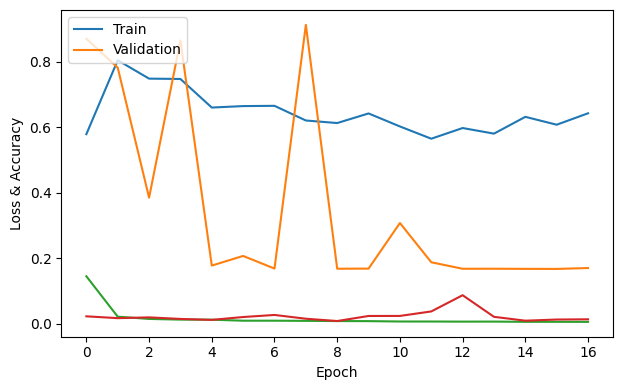

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3_6_1.history['accuracy'])
plt.plot(history3_6_1.history['val_accuracy'])
plt.plot(history3_6_1.history['loss'])
plt.plot(history3_6_1.history['val_loss'])
plt.ylabel('Loss & Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Save the model
model3_6_1.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_3_6_1_17.h5')


In [ ]:
print("Predicting")
start = time.time()
predictions_sub = model3_6_1.predict(testing_df)
print('Time Take :  %s minutes' % ((time.time() - start)/60))

Predicting
14822/14822 [==============================] - 26s 2ms/step
Time Take :  0.548020887374878 minutes


In [ ]:
# Convert probabilities to class labels
threshold = 0.5
predictions_sub_label = (predictions_sub > threshold).astype(int)


In [ ]:
df_submissions = pd.DataFrame({
    'primary_close_flag': predictions_sub_label[:, 0],
    'final_close_flag': predictions_sub_label[:, 1]
})

In [ ]:
print("To_CSV")
df_submissions.to_csv('/content/drive/MyDrive/Colab Notebooks/ANN3_6_1_17_submit.csv', index=False)
print("completed")

To_CSV
completed


# New Try with x_test as validation data

In [ ]:
# Define the model
model3_6_2 = Sequential()

# Add the first hidden layer with 128 nodes
model3_6_2.add(Dense(128, input_dim=57, activation='relu'))

# Add the layers with 64 & 32 nodes
model3_6_2.add(Dense(64, activation='relu'))
model3_6_2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model3_6_2.add(Dense(32, activation='relu'))
model3_6_2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3_6_2.add(Dense(32, activation='relu'))
model3_6_2.add(Dropout(0.5))
model3_6_2.add(Dense(32, activation='relu'))
model3_6_2.add(Dense(8, activation='relu'))

# Add the output layer with 2 nodes (for 2 classes)
model3_6_2.add(Dense(2, activation='sigmoid'))  # Activation Functaion here

# Compile the model
model3_6_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change here


In [ ]:
history3_6_2 = model3_6_2.fit(x_train, y_train, epochs=20, batch_size=64,
                          validation_data=(x_test, y_test),
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/20
12105/12105 [==============================] - 87s 7ms/step - loss: 0.1283 - accuracy: 0.5258 - val_loss: 0.0327 - val_accuracy: 0.8006
Epoch 2/20
12105/12105 [==============================] - 89s 7ms/step - loss: 0.0285 - accuracy: 0.6854 - val_loss: 0.0169 - val_accuracy: 0.8488
Epoch 3/20
12105/12105 [==============================] - 70s 6ms/step - loss: 0.0176 - accuracy: 0.7030 - val_loss: 0.0309 - val_accuracy: 0.4127
Epoch 4/20
12105/12105 [==============================] - 80s 7ms/step - loss: 0.0130 - accuracy: 0.6582 - val_loss: 0.0122 - val_accuracy: 0.2864
Epoch 5/20
12105/12105 [==============================] - 71s 6ms/step - loss: 0.0115 - accuracy: 0.6099 - val_loss: 0.0296 - val_accuracy: 0.1706
Epoch 6/20
12105/12105 [==============================] - 72s 6ms/step - loss: 0.0095 - accuracy: 0.6381 - val_loss: 0.0160 - val_accuracy: 0.5092
Epoch 7/20
12105/12105 [==============================] - 80s 7ms/step - loss: 0.0089 - accuracy: 0.6534 - val_loss: 0

In [ ]:
model3_6_2.summary()

AttributeError: 'History' object has no attribute 'summary'

In [ ]:
predictions = model3_6_2.predict(x_test)

# Convert probabilities to class labels
threshold = 0.5
predictions_label = (predictions > threshold).astype(int)

df_pred = pd.DataFrame({
    'primary_close_flag': predictions_label[:, 0],
    'final_close_flag': predictions_label[:, 1]
})

print("Printing accuracies")
print_accuracy(df_pred)

AttributeError: 'History' object has no attribute 'predict'

In [ ]:
# Save the model
model3_6_2.save('/content/drive/MyDrive/Colab Notebooks/Hackathon/Model_ANN_3_6_2.h5')


In [ ]:
model3_6_2_1 = model3_6_2.fit(x_train, y_train, epochs=5, batch_size=64,
                          validation_data=(x_test, y_test),
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=7)])